In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from scipy.stats import norm
from datetime import *

[*********************100%%**********************]  4 of 4 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

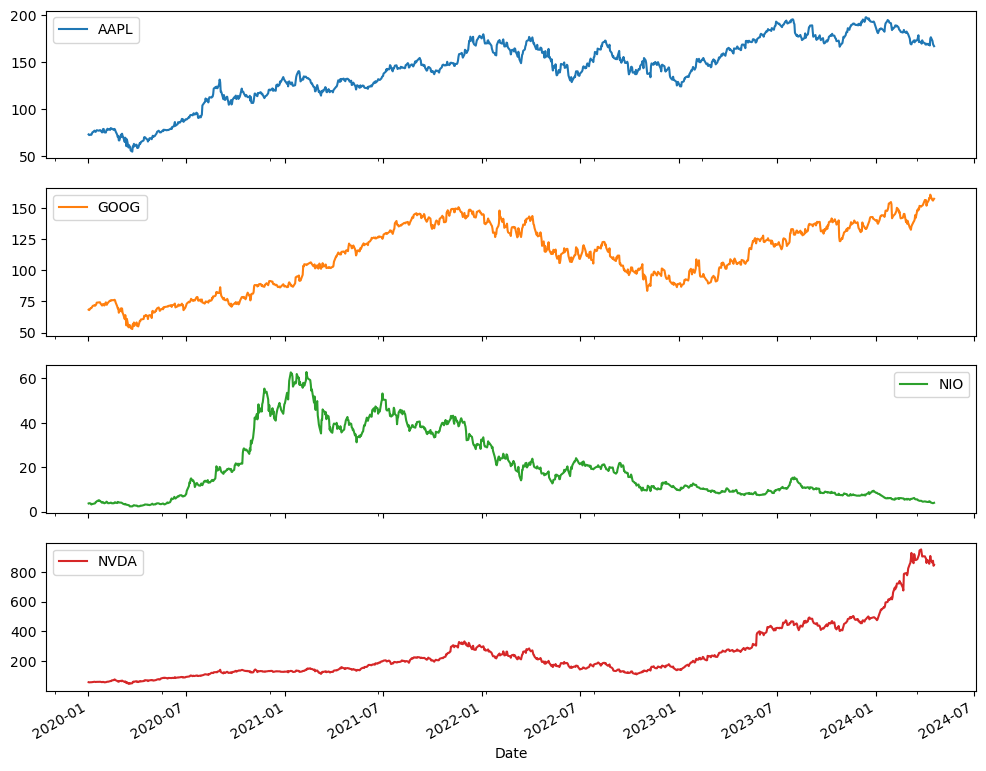

In [2]:
today_date = str(date.today())
share_names = ["AAPL", "NVDA", "GOOG", "NIO"]
share_weights = [1/4, 1/4, 1/4, 1/4]
df = yf.download(share_names, start = '2020-01-01', end = today_date)
df['Adj Close'].plot(subplots = True, figsize = (12, 10) )

In [3]:
def get_data(share_names, start_date = '2020-01-01', end_date = today_date):
    df = yf.download(share_names, start_date, end_date)
    data = df['Adj Close'].pct_change()
    
    covariance_matrix = data.cov()
    mean_returns = data.mean()
    
    return mean_returns, covariance_matrix

In [4]:
mean_returns, covariance_matrix = get_data(share_names)
print(mean_returns)
print(covariance_matrix)

[*********************100%%**********************]  4 of 4 completed

Ticker
AAPL    0.000980
GOOG    0.000990
NIO     0.001405
NVDA    0.003029
dtype: float64
Ticker      AAPL      GOOG       NIO      NVDA
Ticker                                        
AAPL    0.000429  0.000294  0.000369  0.000454
GOOG    0.000294  0.000433  0.000362  0.000442
NIO     0.000369  0.000362  0.002733  0.000644
NVDA    0.000454  0.000442  0.000644  0.001154


## Monte Carlo Simulation



[[10124.62902986  9977.46848274 10045.21357429 ...  9863.74999291
   9921.66288984 10307.71847192]
 [10032.40553434  9660.45075362 10137.78293381 ... 10122.5067516
   9784.45040453 10459.09928473]
 [ 9723.55535396  9678.04544333 10480.12355993 ... 10160.67797807
  10009.99042399 10385.24873874]
 ...
 [13750.42745015  8515.11712116 15230.23360246 ... 14247.38976091
  14180.61200972  7189.20881674]
 [14150.06500287  8521.00169265 15596.93296603 ... 14136.12450953
  14137.70609741  7103.56002782]
 [14807.578673    8514.11342861 15645.12430366 ... 13838.05350328
  14099.39386734  7100.77002948]]


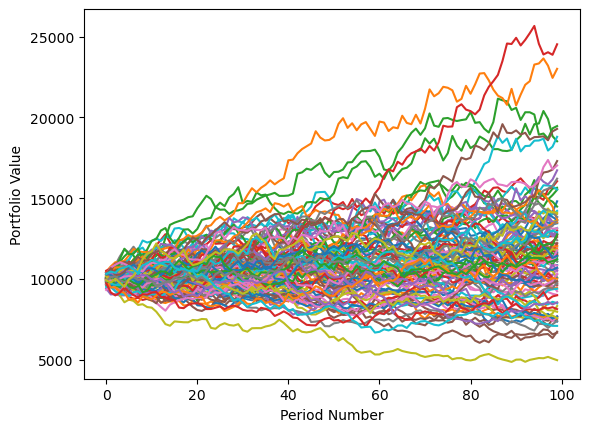

In [9]:
simulation_nb = 100
period_nb = 100
portfolio_simulations = np.full(shape=(period_nb, simulation_nb), fill_value = 0.0)
portfolio_value = 10000
mean_matrix = np.full(shape=(period_nb, len(share_names)), fill_value = mean_returns) 
mean_matrix = mean_matrix.T

for i in range(0, simulation_nb): 
    
    X = np.random.normal(size = (period_nb, len(share_names)))
    L = np.linalg.cholesky(covariance_matrix)
    
    daily_returns = mean_matrix + np.inner(L, X)
    
    portfolio_simulations[:, i]= np.cumprod(np.inner(share_weights, daily_returns.T)+1)*portfolio_value
     
print(portfolio_simulations)
plt.plot(portfolio_simulations)
plt.xlabel('Period Number')
plt.ylabel('Portfolio Value')
plt.show()